# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

data_combine_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='inner')

# Display the data table for preview
data_combine_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [106]:
# Checking the number of mice.
print(data_combine_df['Mouse ID'].nunique())

249


In [107]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_id = data_combine_df[data_combine_df.duplicated(['Mouse ID','Timepoint'])]["Mouse ID"].unique()

duplicated_id


array(['g989'], dtype=object)

In [108]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicated_mice_id = data_combine_df.loc[data_combine_df["Mouse ID"] == duplicated_id[0],:]
loc_index = duplicated_mice_id.index

duplicated_mice_id


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [109]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = data_combine_df.drop(data_combine_df.index[loc_index])

clean_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [110]:
# Checking the number of mice in the clean DataFrame.
print(clean_mouse_df['Mouse ID'].nunique())

248


## Summary Statistics

In [111]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_groupby = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
tumor_mean = drug_regimen_groupby.mean()
tumor_median = drug_regimen_groupby.median()
tumor_variance = drug_regimen_groupby.var()
tumor_sd = drug_regimen_groupby.std()
tumor_sem = drug_regimen_groupby.sem()

summary_df = pd.DataFrame({
    "Mean Tumor Volume" : tumor_mean,
    "Median Tumor Volume" : tumor_median,
    "Tumor Volume Variance" : tumor_variance,
    "Tumor Volume Std. Dev." : tumor_sd,
    "Tumor Volume Std. Err." : tumor_sem
})

summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [112]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation = drug_regimen_groupby.agg(['mean', 'median','var','std','sem','count'])

summary_aggregation

,mean,median,var,std,sem,count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


## Bar and Pie Charts

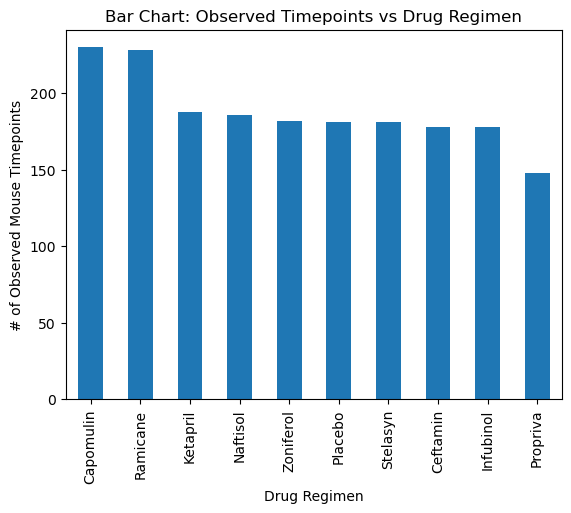

In [113]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_groupby.agg('count').sort_values(ascending=False).plot(kind="bar",title="Bar Chart: Observed Timepoints vs Drug Regimen",xlabel="Drug Regimen",ylabel="# of Observed Mouse Timepoints")
plt.show()


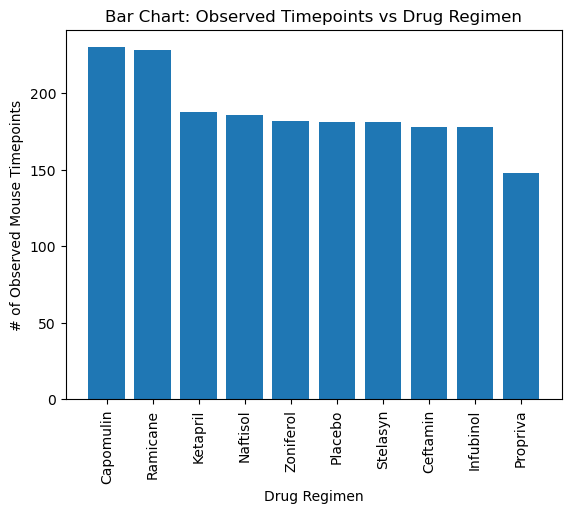

In [114]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


plt.bar(drug_regimen_groupby.agg('count').sort_values(ascending=False).index,drug_regimen_groupby.agg('count').sort_values(ascending=False))
plt.xticks(rotation="vertical")
plt.title("Bar Chart: Observed Timepoints vs Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

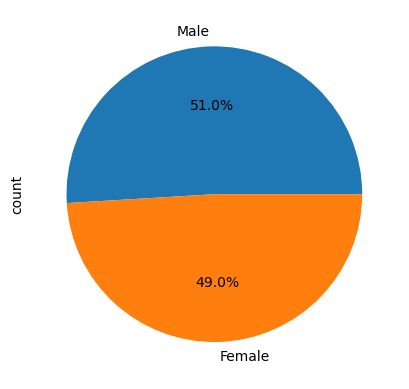

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

clean_mouse_df["Sex"].value_counts().plot.pie(y="Sex",autopct="%1.1f%%")
plt.show()

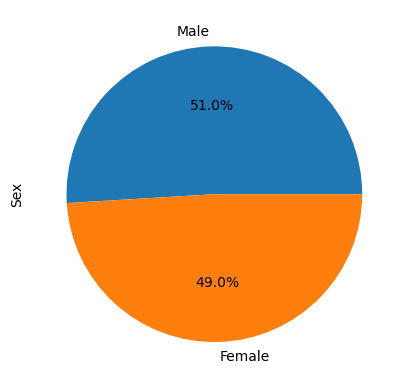

In [116]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Male = clean_mouse_df["Sex"].value_counts()["Male"]
Female = clean_mouse_df["Sex"].value_counts()["Female"]
pies = ["Male","Female"]
pie_percent = [Male,Female]
plt.pie(pie_percent,labels=pies,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [117]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

clean_time_groupby = clean_mouse_df.groupby("Mouse ID")["Timepoint"]
clean_final_time_df = clean_time_groupby.last()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoint_df = pd.merge(data_combine_df,clean_final_time_df,on=["Mouse ID","Timepoint"]).reset_index()

last_timepoint_df



,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,45,38.982878,2,Capomulin,Female,9,22
1,1,f932,0,45.000000,0,Ketapril,Male,15,29
2,2,g107,35,71.905117,0,Ketapril,Female,2,29
3,3,a457,10,49.783419,0,Ketapril,Female,11,30
4,4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...,...
243,243,t565,45,34.455298,0,Capomulin,Female,20,17
244,244,i557,45,47.685963,1,Capomulin,Female,1,24
245,245,m957,45,33.329098,1,Capomulin,Female,3,19
246,246,f966,20,30.485985,0,Capomulin,Male,16,17


In [118]:
# Put treatments into a list for for loop (and later for plot labels)

Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

Tumor_Vol = []

for i in range(len(Treatments)):                                 
    Tumor_Vol.append(last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == Treatments[i],"Tumor Volume (mm3)"])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    q = Tumor_Vol[i].quantile([.25,.5,.75])
    lq = q[.25]
    uq = q[.75]
    median = q[.5]
    iqr = uq-lq
    lower_bound = lq - (1.5*iqr)
    upper_bound = uq + (1.5*iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

    reduced = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == Treatments[i],"Tumor Volume (mm3)"]
    print(f"{Treatments[i]}'s potential outliers: {reduced.loc[(reduced > upper_bound) | (reduced < lower_bound)]}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


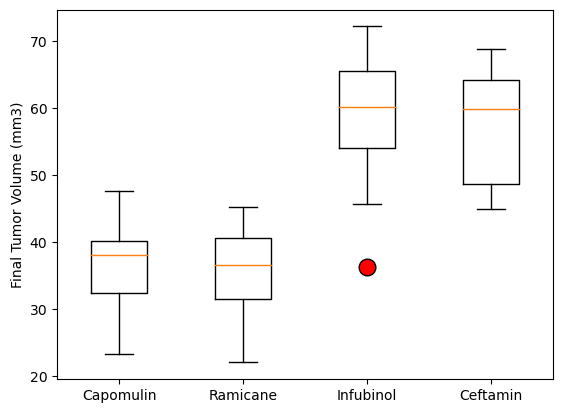

In [119]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
a=dict(markerfacecolor='r',markersize=12)
ax1.boxplot(Tumor_Vol,flierprops=a)
ax1.set_xticklabels(Treatments)
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

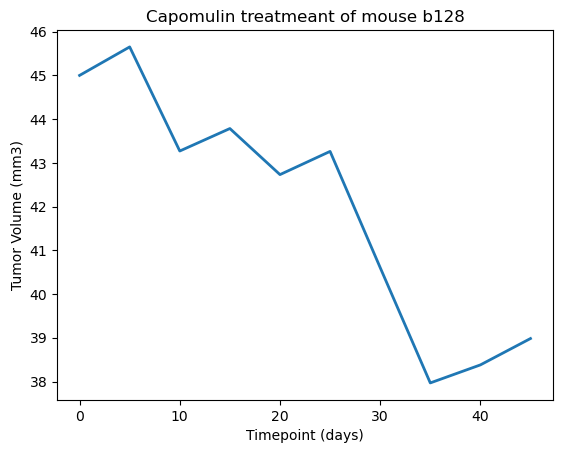

In [120]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_df = data_combine_df.loc[data_combine_df["Mouse ID"] == "b128",:]
capomulin_df

x_axisTP = capomulin_df["Timepoint"]
tumsiz = capomulin_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse b128')
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

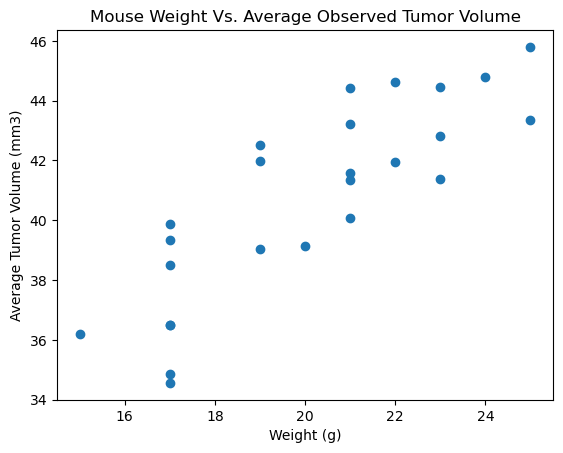

In [124]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = clean_mouse_df[clean_mouse_df["Drug Regimen"] == "Capomulin"]

mice_weights = capomulin_df.groupby("Mouse ID")["Weight (g)"].last()
mice_tumor = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()


plt.scatter(mice_weights,mice_tumor)
plt.title("Mouse Weight Vs. Average Observed Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()




## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


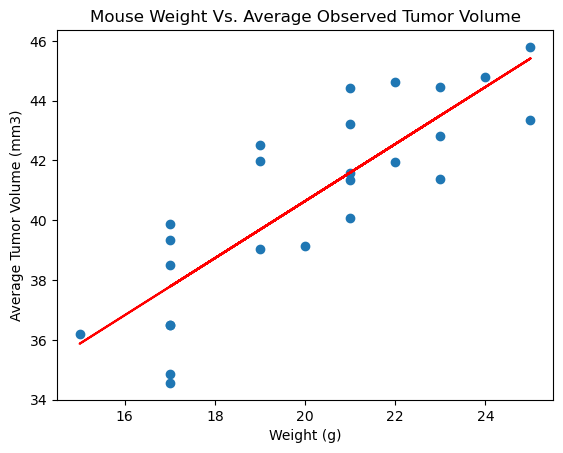

In [125]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = mice_weights
y_values = mice_tumor

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = (slope * x_values) + intercept

print(f"The correlation between mouse weight and the average tumor volume is {rvalue:,.2f}")


plt.scatter(mice_weights,mice_tumor)
plt.plot(x_values,regress_values,"r-")
plt.title("Mouse Weight Vs. Average Observed Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
